In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as stats
from sklearn.metrics import mutual_info_score
from scipy.stats.distributions import chi2
from scipy.special import gamma, gammaln
import ruptures as rpt

In [20]:
from bocd import GaussianMean, GaussianNormalGamma, ConstantHazard, BOCD
from bocd.utils import generate_data_const_var, generate_data, plot_posterior

In [21]:
T      = 1000   # Number of observations.
hazard = 1/100  # Constant prior on changepoint probability.
mean0  = 0      # The prior mean on the mean parameter.
var0   = 4      # The prior variance for mean parameter.
varx   = 1      # The known variance of the data.

In [22]:
model = GaussianMean(mean0, var0, varx)
h = ConstantHazard(100)
bocd = BOCD(model, h)

In [23]:
data, cps = generate_data_const_var(varx, mean0, var0, T, hazard)

In [24]:
# Iterate through data and detect changepoints
for x in data:
    bocd.step(x)

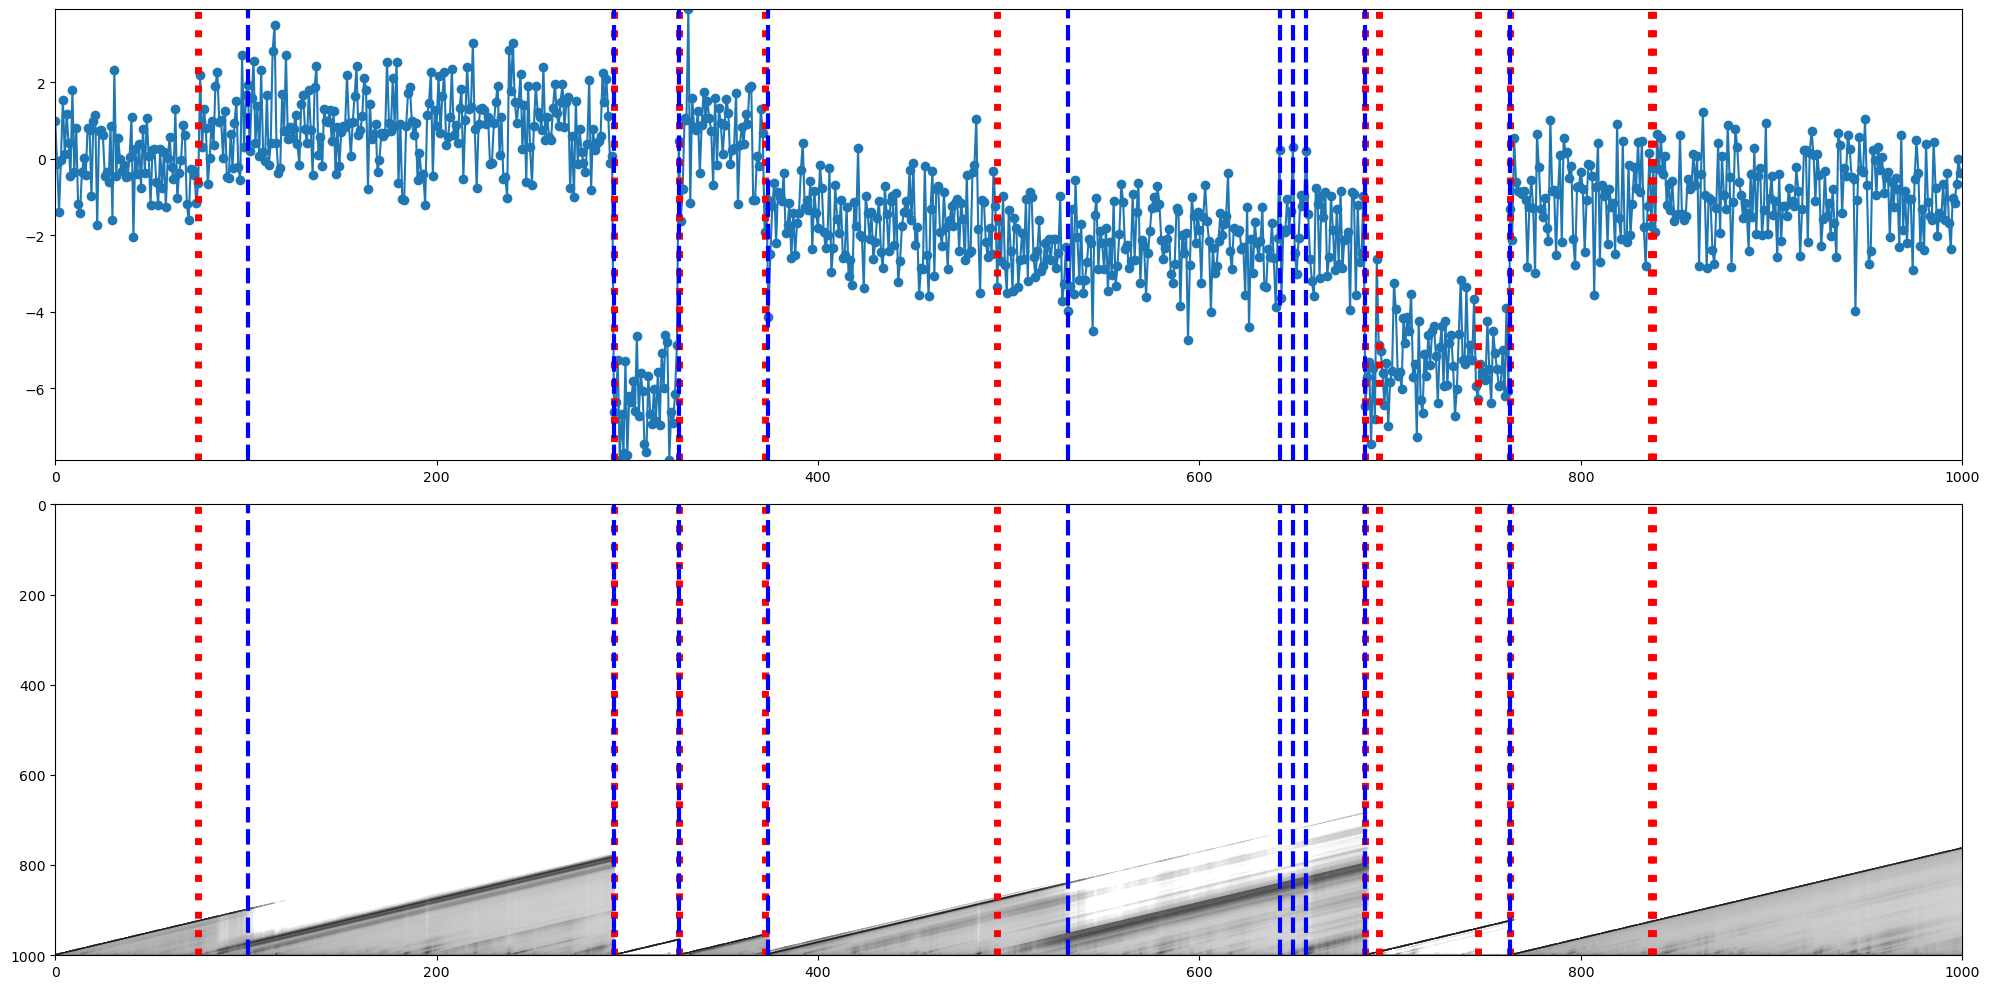

In [25]:
plot_posterior(T, data, cps, bocd)

In [38]:
signal = np.array(data)

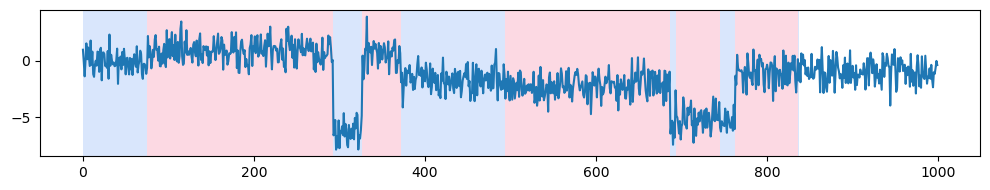

In [39]:
fig, ax_array = rpt.display(signal, cps)

In [42]:
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

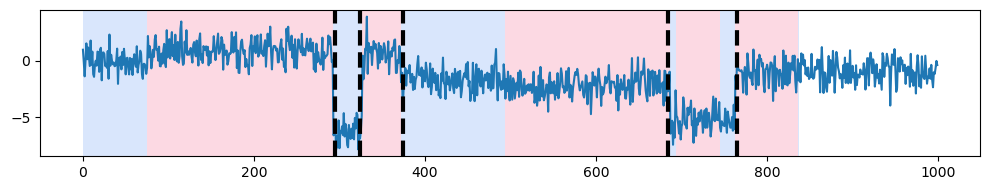

In [43]:
rpt.display(signal, cps, result)
plt.show()

In [93]:
T = 1000
alpha0 = 5
beta0  = 1
kappa0 = 0.2
mu0    = 0

In [94]:
model = GaussianMeanVar(alpha0, beta0, kappa0, mu0)
h = ConstantHazard(100)
bocd = BOCD(model, h)

In [95]:
data, cps = generate_data(alpha0, beta0, kappa0, mu0, T, hazard)

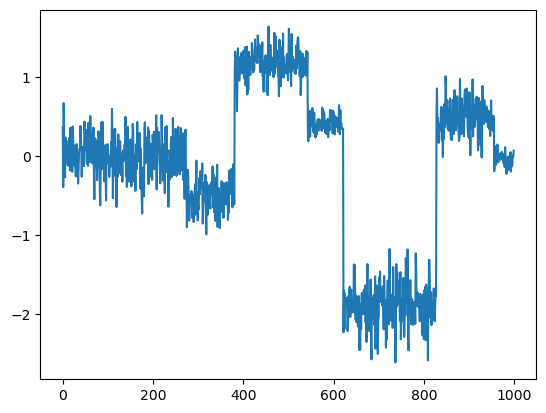

In [96]:
plt.plot(data)
plt.show()

In [91]:
# Iterate through data and detect changepoints
for x in data:
    bocd.step(x)

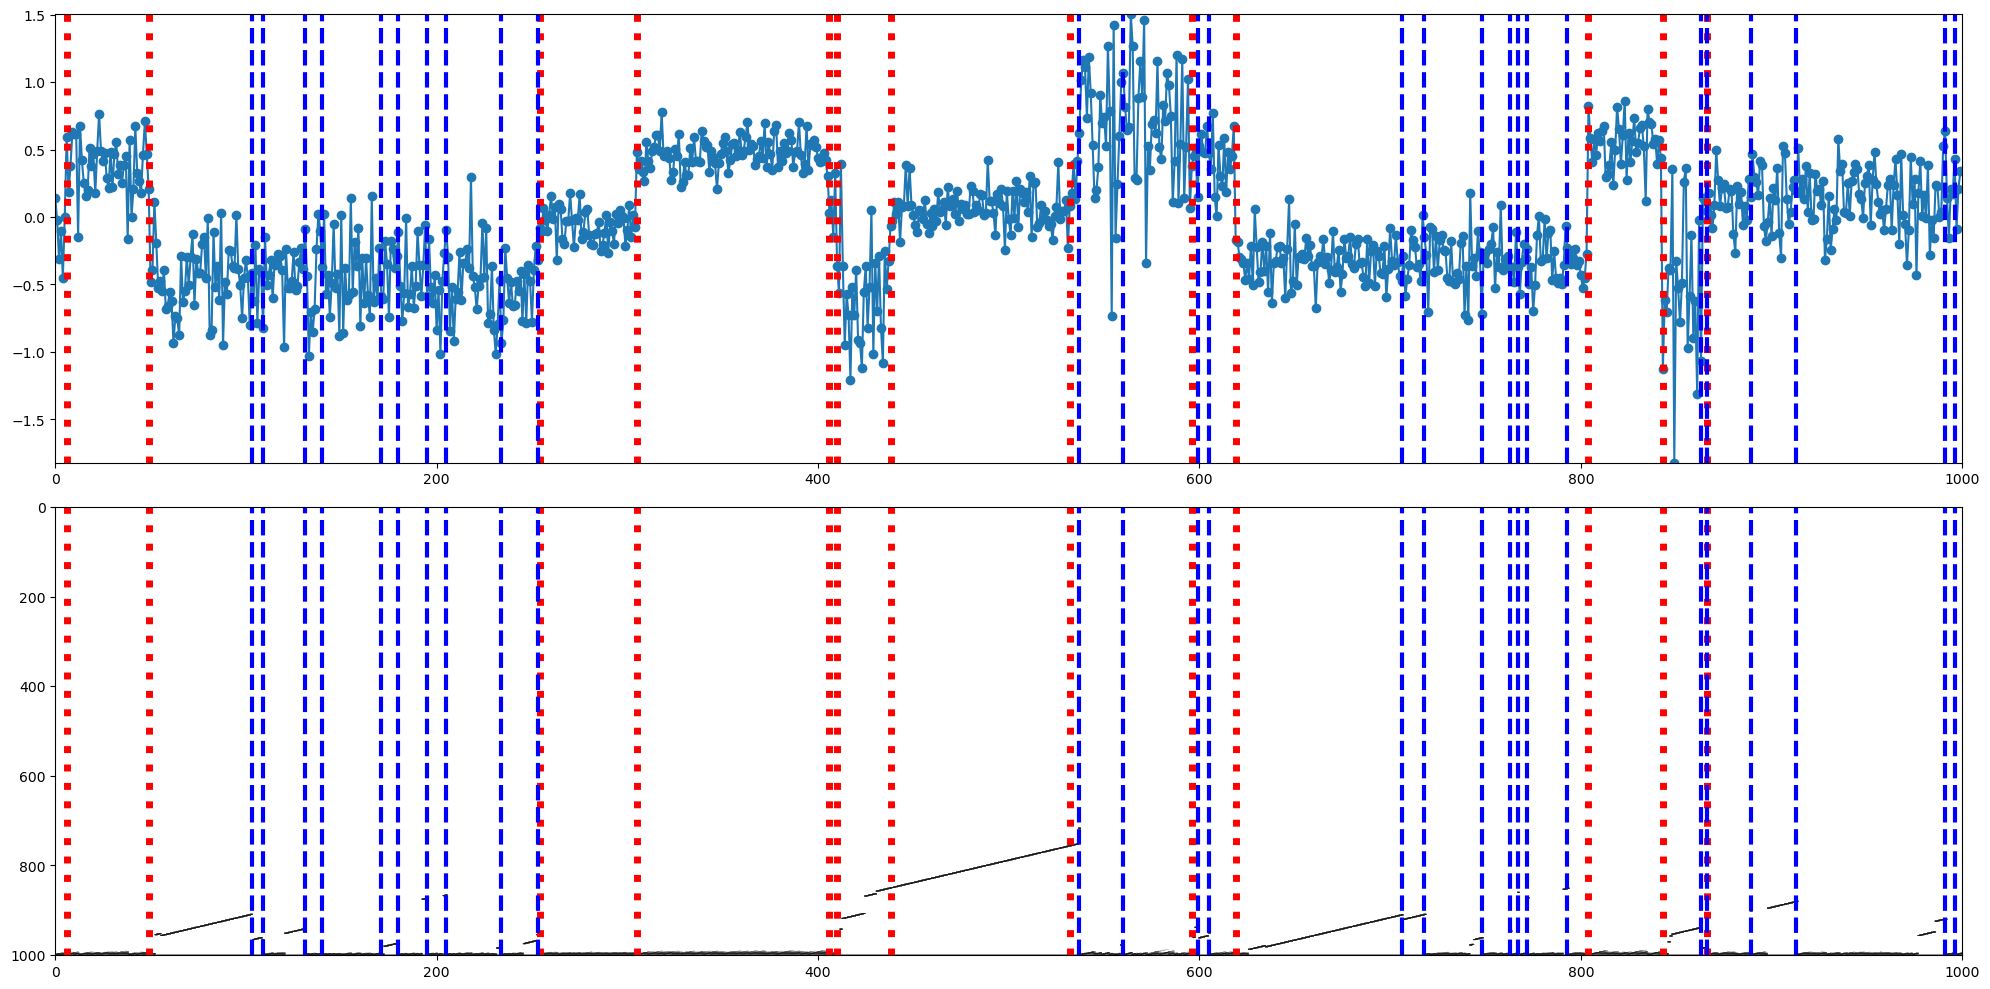

In [92]:
plot_posterior(T, data, cps, bocd)

In [8]:
def invchi2(x, nu, tausquared):
    prod = nu*tausquared
    factor = (nu/2)*(np.log(prod)-np.log(2))-gammaln(nu/2)-prod/(2*x)+(1+nu/2)*np.log(x)
    return np.exp(factor)

In [10]:
invchi2(2, 1, 1)

0.8787825789354448

In [12]:
stats.norm(0,1).logpdf(2)

-2.9189385332046727

In [ ]:
chi